In [1]:
#Imports
import os
from pathlib import Path 
import pandas as pd
import IPython.display as ipd
#import librosa
#import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import sys
import librosa
import librosa.display
from fastai.vision import *
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
df = pd.read_csv('syndf.csv',sep='\t')
import subprocess
from sklearn.preprocessing import scale

# <center> Models with waveplots

## <center> First model with no preprocessing

### Loading the datasets

We load the dataset from the folder, split it randomly and label from the folder name, creating a databunch and normalizing it to use ImageNet pretrained.

In [2]:
pd.set_option('display.max_colwidth', None)
path='/home/javio/Audio/CommonVoice/Spanish/waveplotsNoProc/'
np.random.seed(42)
training=ImageList.from_folder(path).split_by_rand_pct(0.25).label_from_folder()
data = (training.databunch(bs=96).normalize(imagenet_stats))

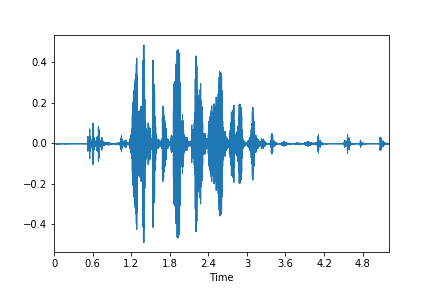

In [5]:
training.train[905][0]

In [95]:
data

ImageDataBunch;

Train: LabelList (19832 items)
x: ImageList
Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Valid: LabelList (6610 items)
x: ImageList
Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432),Image (3, 288, 432)
y: CategoryList
natural,synth,natural,synth,synth
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Test: None

### Now we select the architecture, create a learner and find a good learning rate.

In [3]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])
#learn = learn.to_fp16()

In [97]:
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


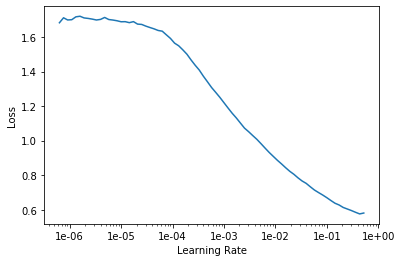

In [98]:
learn.lr_find()
learn.recorder.plot()

### Now we choose learning rate and start fitting cycles

In [99]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

In [101]:
#It saves it to the path (waveplots) folder. You can load it either:
#1. use learn.save, and learn.load. but you need build DATABUNCH again with some train data and same preprocessing.
#2. use learn.export(), and learn.load_learner(). but you must build data with Fastai data API
learn.save('FirstClassR345epochFr')
#learn.export('FirstClassR345epochFr.pkl')

In [4]:
learn=learn.load('FirstClassR345epochFr')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


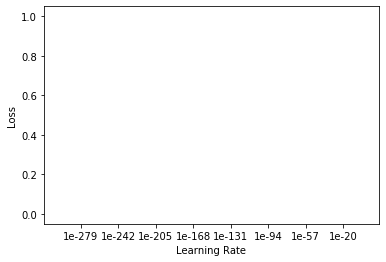

In [10]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

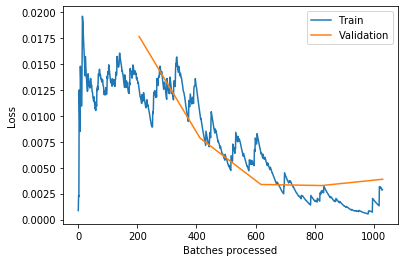

In [11]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))
learn.recorder.plot_losses()

### Now we check results, and save our model (both .pth and .pkl)

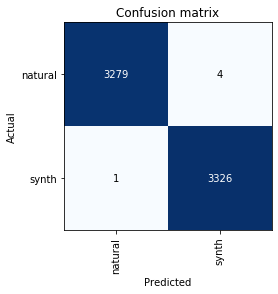

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.save('FirstClassR3410epochUnFr')

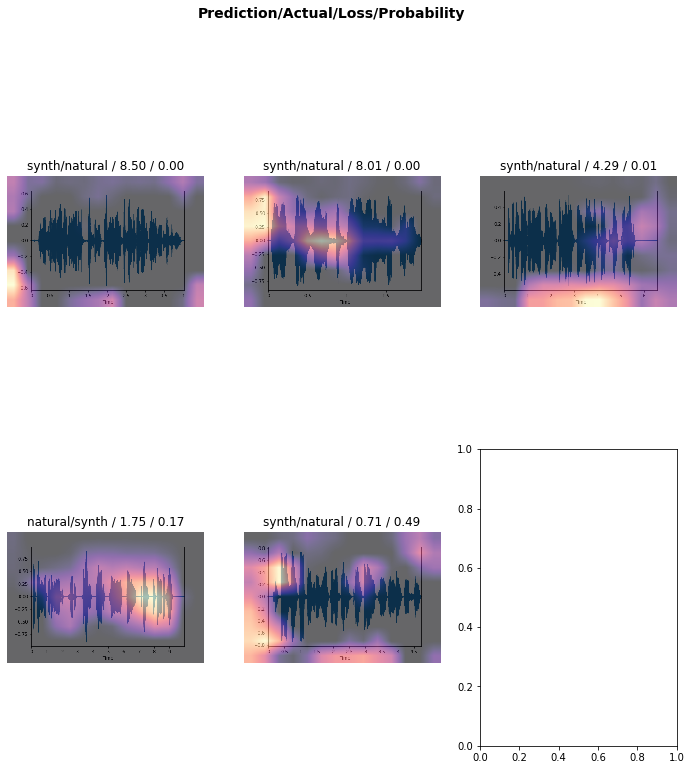

In [21]:
interp.plot_top_losses(5, heatmap=True)

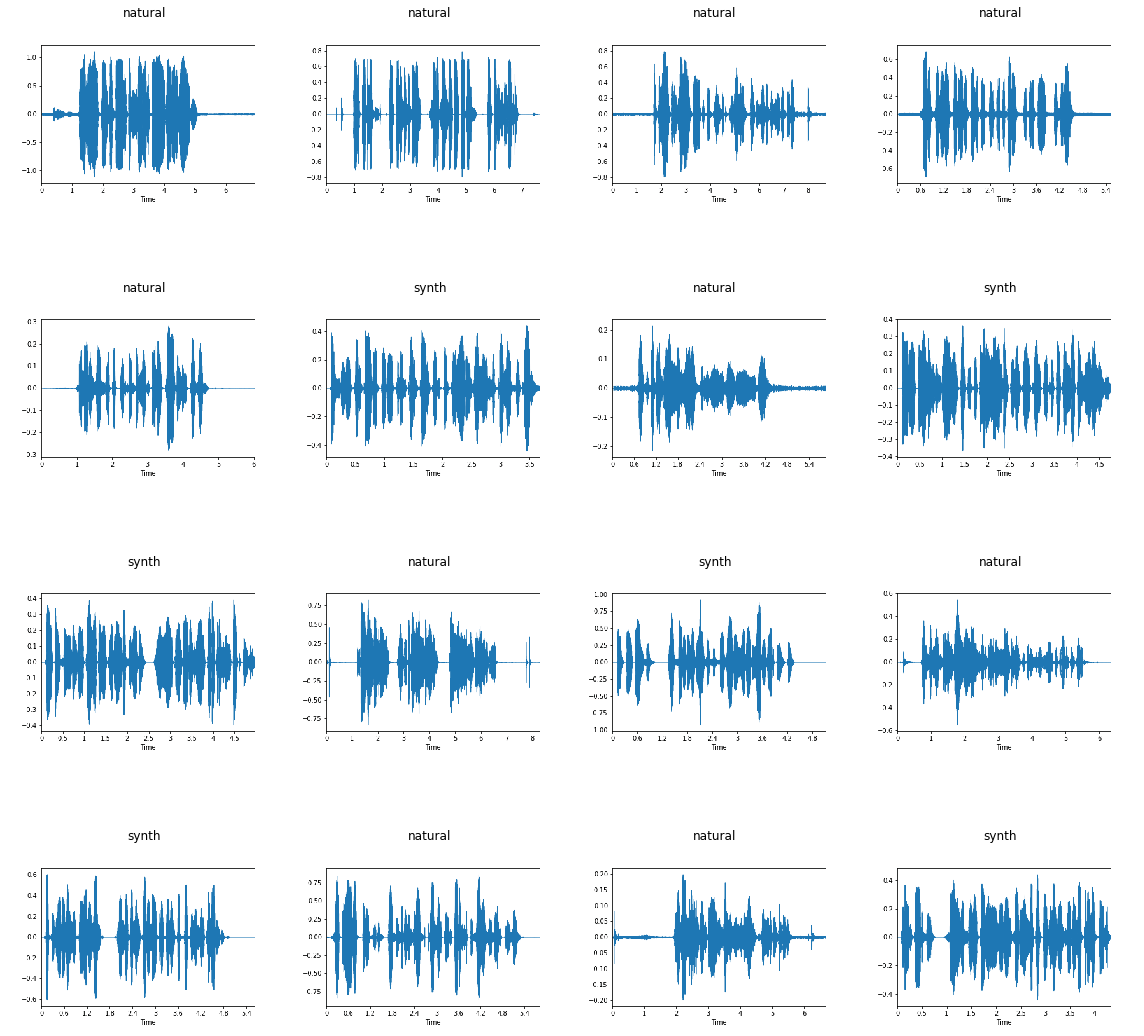

In [20]:
data.show_batch(4)

In [ ]:
#learn.export('FullDSRes34tfms-5f5epoch-stage1.pkl')
learn.export('FirstClassR3410epochUnFr.pkl')

## <center> Second model with preprocessing

### Loading the datasets

We load the dataset from the folder, split it randomly and label from the folder name, creating a databunch and normalizing it to use ImageNet pretrained.

We are going to create a df with the routes of all the files we want (which are now in whatever folder/plots

In [22]:
pd.set_option('display.max_colwidth', None)
path='/home/javio/Audio/CommonVoice/Spanish/waveplots/'
np.random.seed(42)
training=ImageList.from_folder(path).split_by_rand_pct(0.25).label_from_folder()
data = (training.databunch(bs=32).normalize(imagenet_stats))

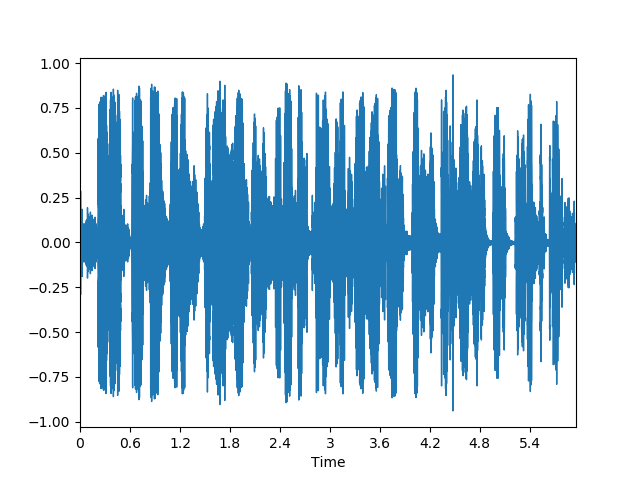

In [3]:
training.train[905][0]

In [3]:
data

ImageDataBunch;

Train: LabelList (19818 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Valid: LabelList (6605 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640)
y: CategoryList
synthetic,synthetic,synthetic,natural,synthetic
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Test: None

### Now we select the architecture, create a learner and find a good learning rate.

In [25]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])
#learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


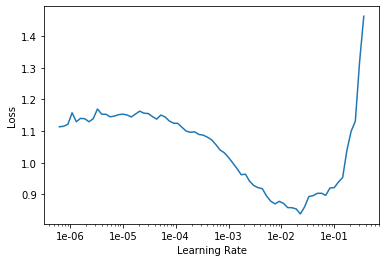

In [5]:
learn.lr_find()
learn.recorder.plot()

### Now we choose learning rate and start fitting cycles

In [6]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

In [7]:
#It saves it to the path (waveplots) folder. You can load it either:
#1. use learn.save, and learn.load. but you need build DATABUNCH again with some train data and same preprocessing.
#2. use learn.export(), and learn.load_learner(). but you must build data with Fastai data API
learn.save('SecondClassR345epochFr')
#learn.export('FirstClassR345epochFr.pkl')

In [4]:
learn=learn.load('SecondClassR345epochFr')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


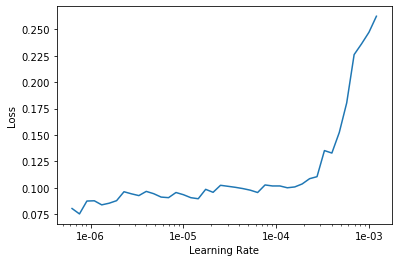

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

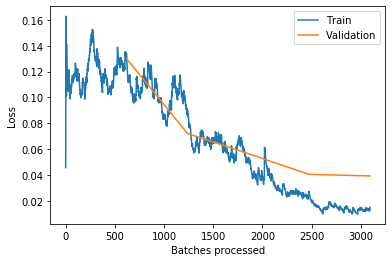

In [9]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))
learn.recorder.plot_losses()

### Now we check results, and save our model (both .pth and .pkl)

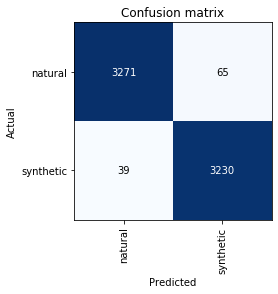

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [17]:
learn.save('SecondClassR3410epochUnf')

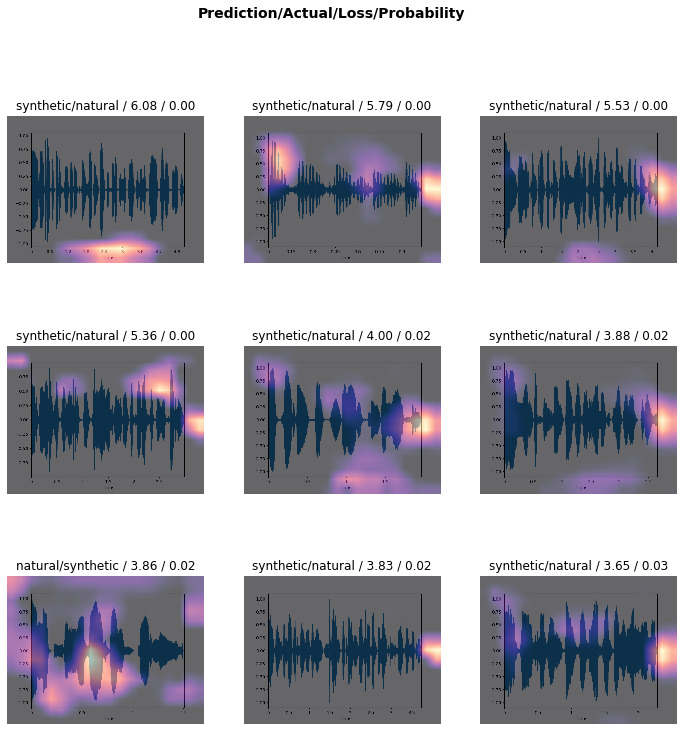

In [16]:
interp.plot_top_losses(9, heatmap=True)

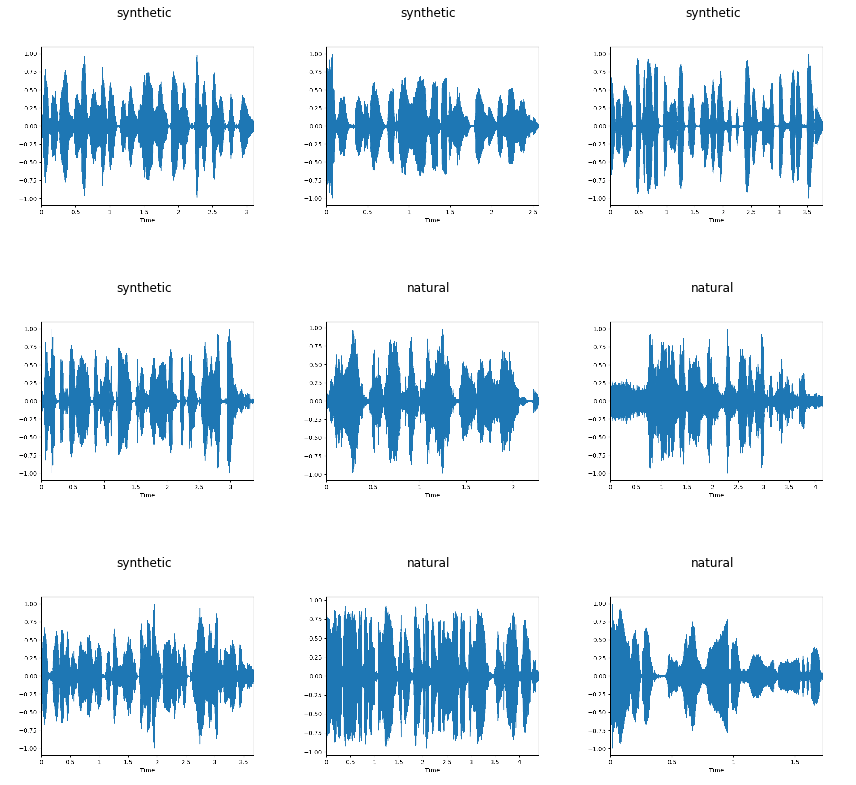

In [15]:
data.show_batch(3)

In [ ]:
#learn.export('FullDSRes34tfms-5f5epoch-stage1.pkl')
learn.export('FirstClassR3410epochUnFr.pkl')

## <center> Third model with preprocessing and better valid

### Loading the datasets

We load the dataset from the folder, split it randomly and label from the folder name, creating a databunch and normalizing it to use ImageNet pretrained.

We are going to create a df with the routes of all the files we want (which are now in whatever folder/plots

In [2]:
pd.set_option('display.max_colwidth', None)
path='/home/javio/Audio/CommonVoice/Spanish/waveplots/'
np.random.seed(42)
training=ImageList.from_folder(path).split_by_folder().label_from_folder()
data = (training.transform(size=(240,320)).databunch(bs=168).normalize(imagenet_stats))

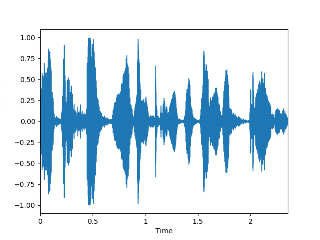

In [21]:
training.train[905][0]

In [23]:
data

ImageDataBunch;

Train: LabelList (26423 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Valid: LabelList (12975 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Test: None

### Now we select the architecture, create a learner and find a good learning rate.

In [3]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])
#learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


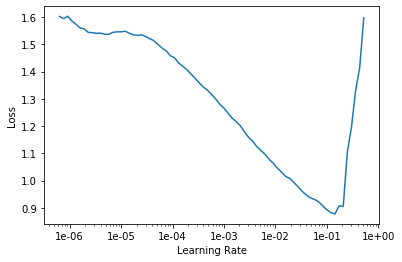

In [5]:
learn.lr_find()
learn.recorder.plot()

### Now we choose learning rate and start fitting cycles

In [6]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

In [7]:
#It saves it to the path (waveplots) folder. You can load it either:
#1. use learn.save, and learn.load. but you need build DATABUNCH again with some train data and same preprocessing.
#2. use learn.export(), and learn.load_learner(). but you must build data with Fastai data API
learn.save('ThirdClassR345epochFr')
#learn.export('FirstClassR345epochFr.pkl')

In [4]:
learn=learn.load('SecondClassR345epochFr')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


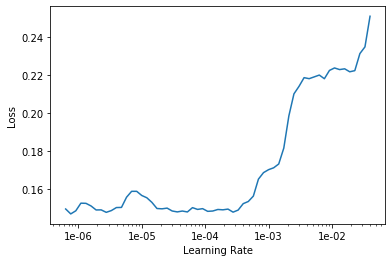

In [8]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

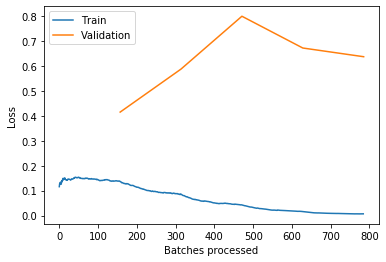

In [9]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))
learn.recorder.plot_losses()

In [ ]:
learn.save('ThirdClassR3410epochUnf')

### Now we check results, and save our model (both .pth and .pkl)

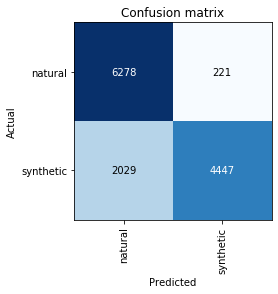

In [205]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

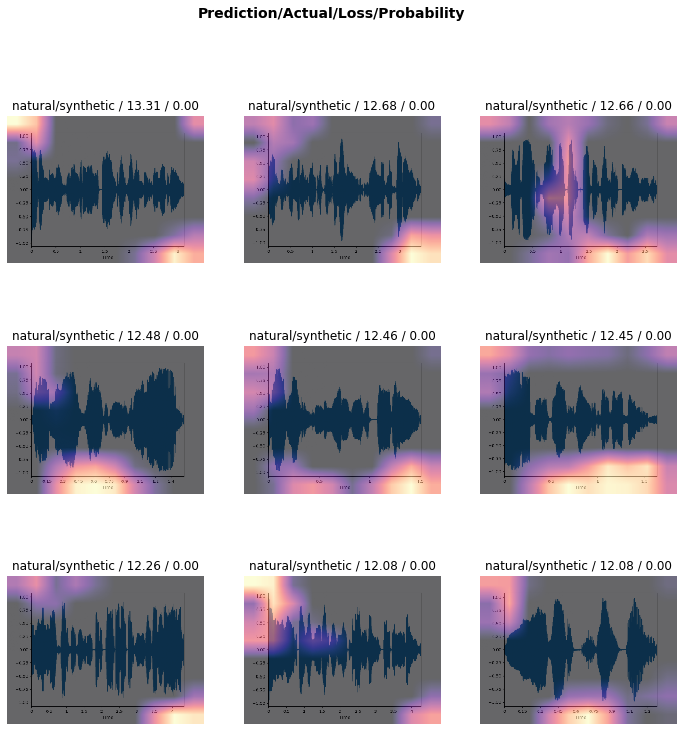

In [12]:
interp.plot_top_losses(9, heatmap=True)

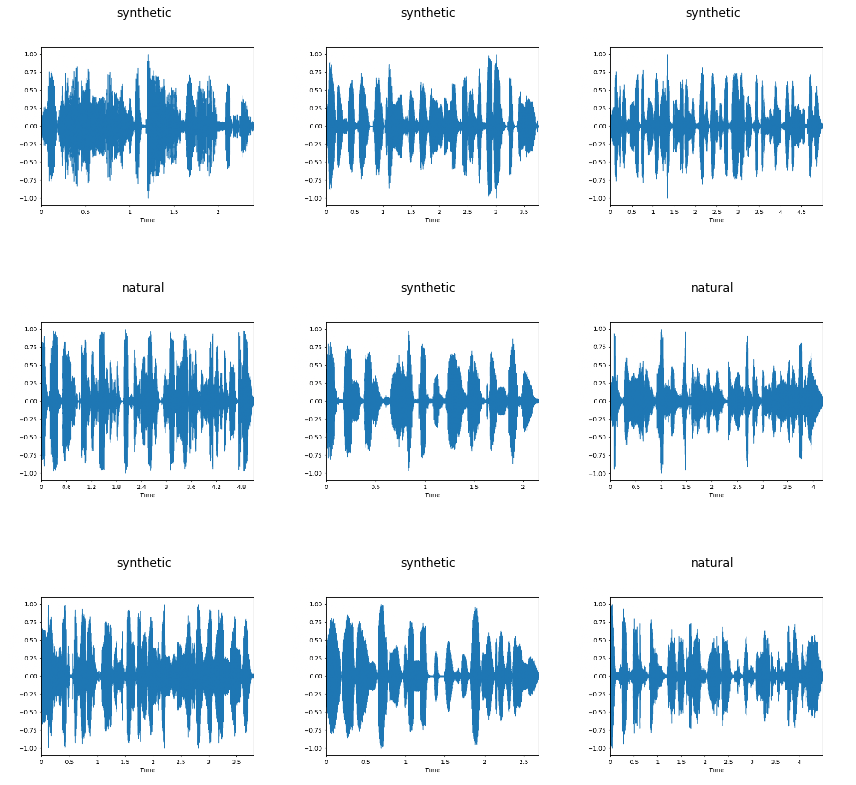

In [13]:
data.show_batch(3)

### We are going to keep training to see if we can improve the model

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


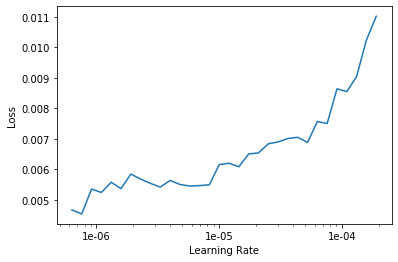

In [14]:
learn.lr_find()
learn.recorder.plot()

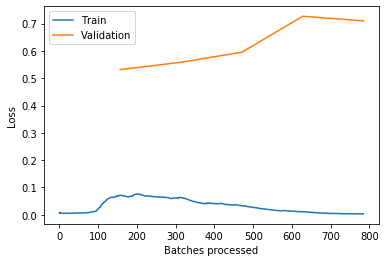

In [15]:
learn.fit_one_cycle(5, slice(1e-3))
learn.recorder.plot_losses()

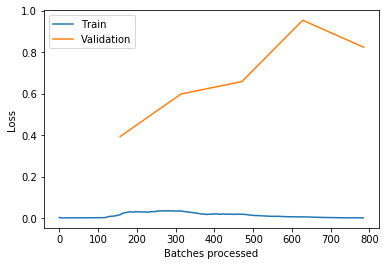

In [16]:
learn.fit_one_cycle(5, slice(1e-3))
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


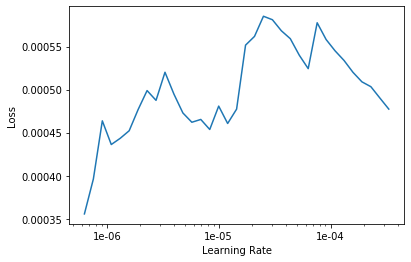

In [17]:
learn.lr_find()
learn.recorder.plot()

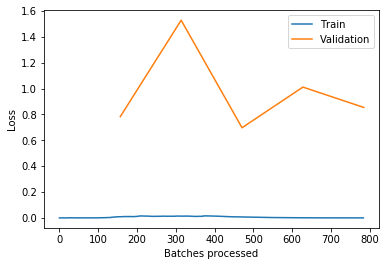

In [19]:
learn.fit_one_cycle(5, slice(1e-3))
learn.recorder.plot_losses()

In [20]:
learn.save('ThirdClassR3430epochUnf')

# <center> Models with MFCCS

## <center> First model

### Loading the datasets

We load the dataset from the folder, split it randomly and label from the folder name, creating a databunch and normalizing it to use ImageNet pretrained.

We are going to create a df with the routes of all the files we want (which are now in whatever folder/plots

In [2]:
pd.set_option('display.max_colwidth', None)
path='/home/javio/Audio/CommonVoice/Spanish/mfccs/'
np.random.seed(42)
training=ImageList.from_folder(path).split_by_folder().label_from_folder()
data = (training.transform(size=(240,320)).databunch(bs=168).normalize(imagenet_stats))

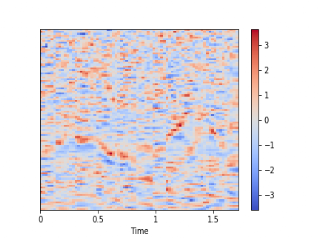

In [3]:
training.train[905][0]

In [6]:
data

ImageDataBunch;

Train: LabelList (26432 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/mfccs;

Valid: LabelList (12975 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/mfccs;

Test: None

### Now we select the architecture, create a learner and find a good learning rate.

In [7]:
arch = models.resnet34
learn = cnn_learner(data, arch, metrics=[accuracy])
#learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


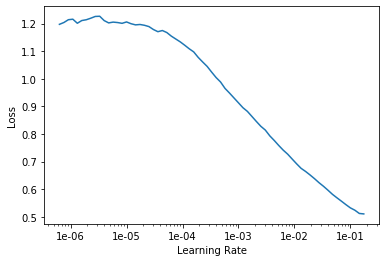

In [8]:
learn.lr_find()
learn.recorder.plot()

### Now we choose learning rate and start fitting cycles

In [9]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

In [10]:
#It saves it to the path (waveplots) folder. You can load it either:
#1. use learn.save, and learn.load. but you need build DATABUNCH again with some train data and same preprocessing.
#2. use learn.export(), and learn.load_learner(). but you must build data with Fastai data API
learn.save('1stMFCCR345epochFr')
#learn.export('FirstClassR345epochFr.pkl')

In [4]:
learn=learn.load('SecondClassR345epochFr')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


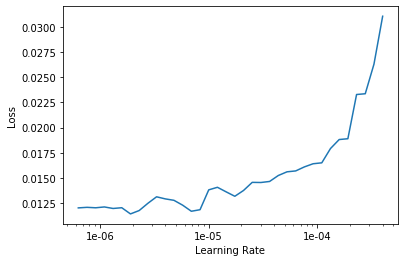

In [11]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

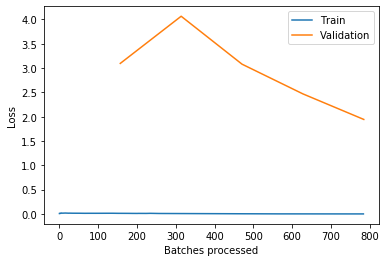

In [12]:
learn.fit_one_cycle(5, slice(1e-5, 1e-4))
learn.recorder.plot_losses()

In [13]:
learn.save('1stMFCCR3410epochUnFr')

### Now we check results, and save our model (both .pth and .pkl)

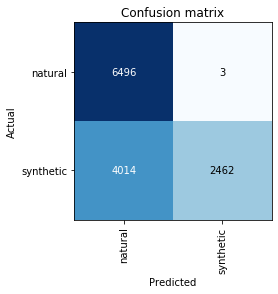

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

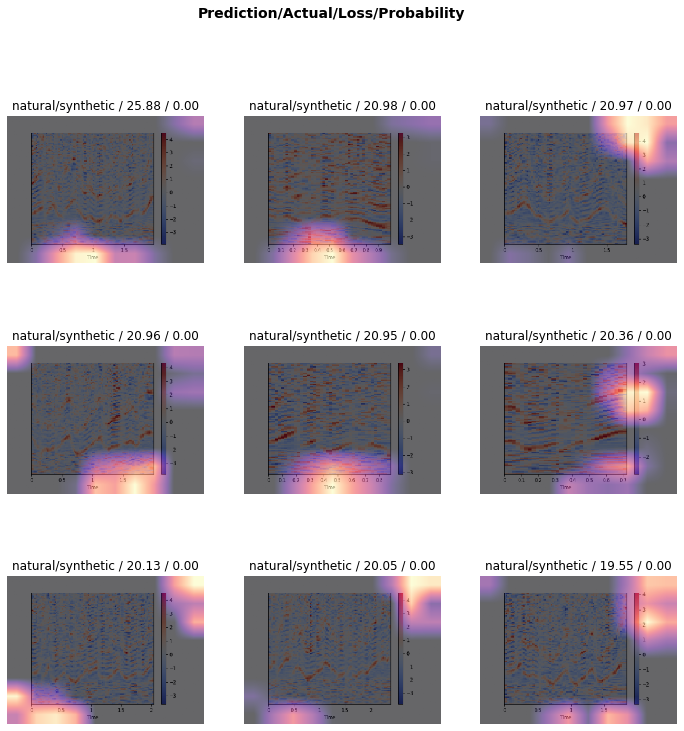

In [15]:
interp.plot_top_losses(9, heatmap=True)

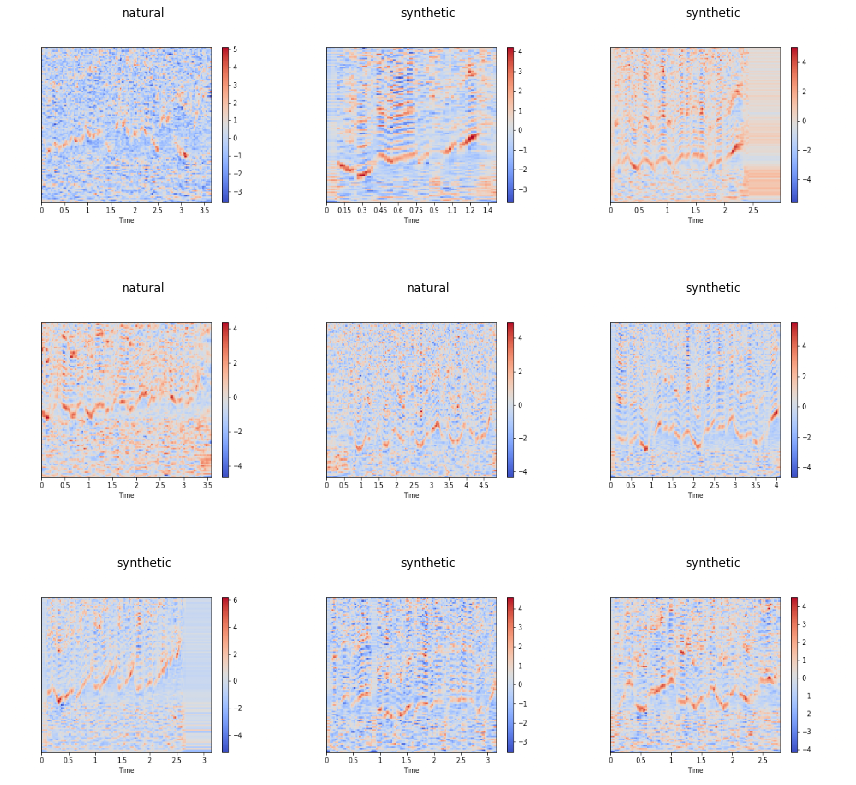

In [17]:
data.show_batch(3)

## <center> Second model with Resnet152

### Loading the datasets

We load the dataset from the folder, split it randomly and label from the folder name, creating a databunch and normalizing it to use ImageNet pretrained.

We are going to create a df with the routes of all the files we want (which are now in whatever folder/plots

In [2]:
pd.set_option('display.max_colwidth', None)
path='/home/javio/Audio/CommonVoice/Spanish/mfccs/'
np.random.seed(42)
training=ImageList.from_folder(path).split_by_folder().label_from_folder()
data = (training.transform(size=(240,320)).databunch(bs=24).normalize(imagenet_stats))

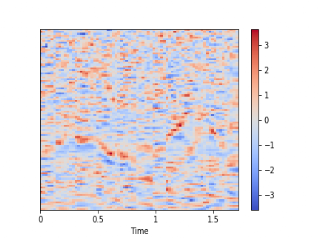

In [49]:
training.train[905][0]

In [50]:
data

ImageDataBunch;

Train: LabelList (26432 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/mfccs;

Valid: LabelList (12975 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/mfccs;

Test: None

### Now we select the architecture, create a learner and find a good learning rate.

In [3]:
arch = models.resnet152
learn = cnn_learner(data, arch, metrics=[accuracy])
#learn = learn.to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


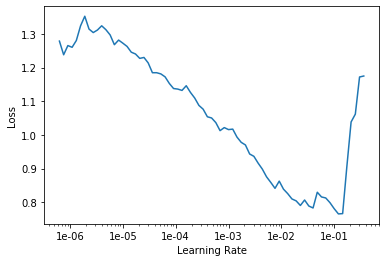

In [4]:
learn.lr_find()
learn.recorder.plot()

### Now we choose learning rate and start fitting cycles

In [5]:
lr = 0.001
learn.fit_one_cycle(5, slice(lr))

In [6]:
#It saves it to the path (waveplots) folder. You can load it either:
#1. use learn.save, and learn.load. but you need build DATABUNCH again with some train data and same preprocessing.
#2. use learn.export(), and learn.load_learner(). but you must build data with Fastai data API
learn.save('1stMFCCR1525epochFr')
#learn.export('FirstClassR345epochFr.pkl')

In [4]:
learn=learn.load('SecondClassR345epochFr')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


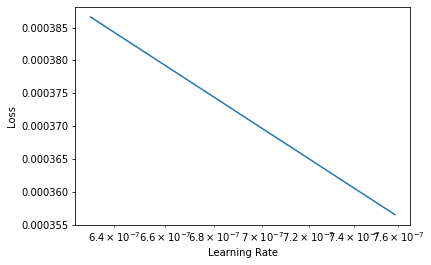

In [7]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

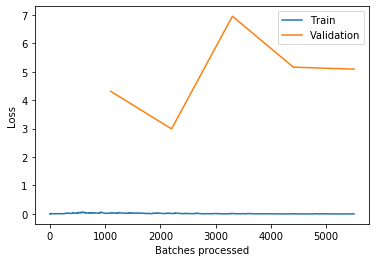

In [8]:
learn.fit_one_cycle(5, slice(1e-3))
learn.recorder.plot_losses()

In [9]:
learn.save('1stMFCCR15210epochUnFr')

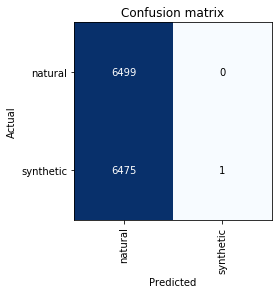

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

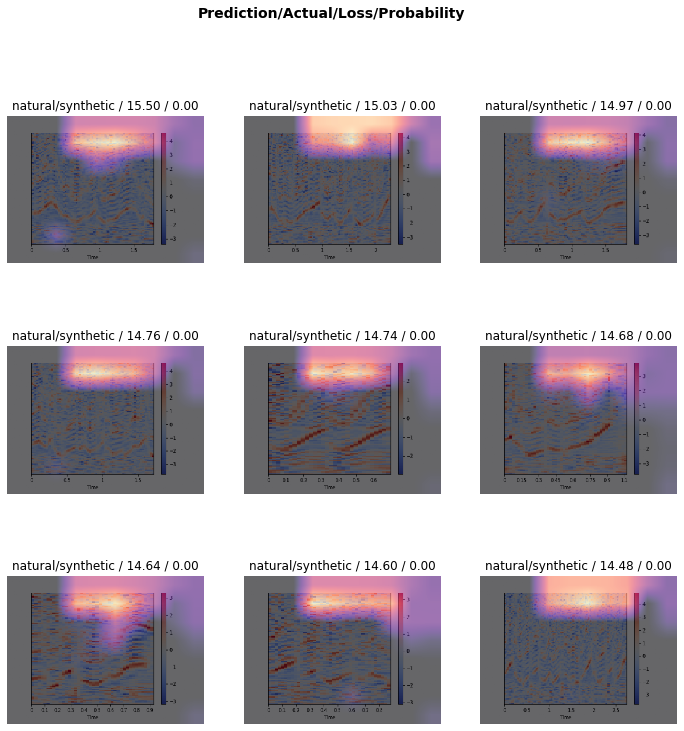

In [13]:
interp.plot_top_losses(9, heatmap=True)

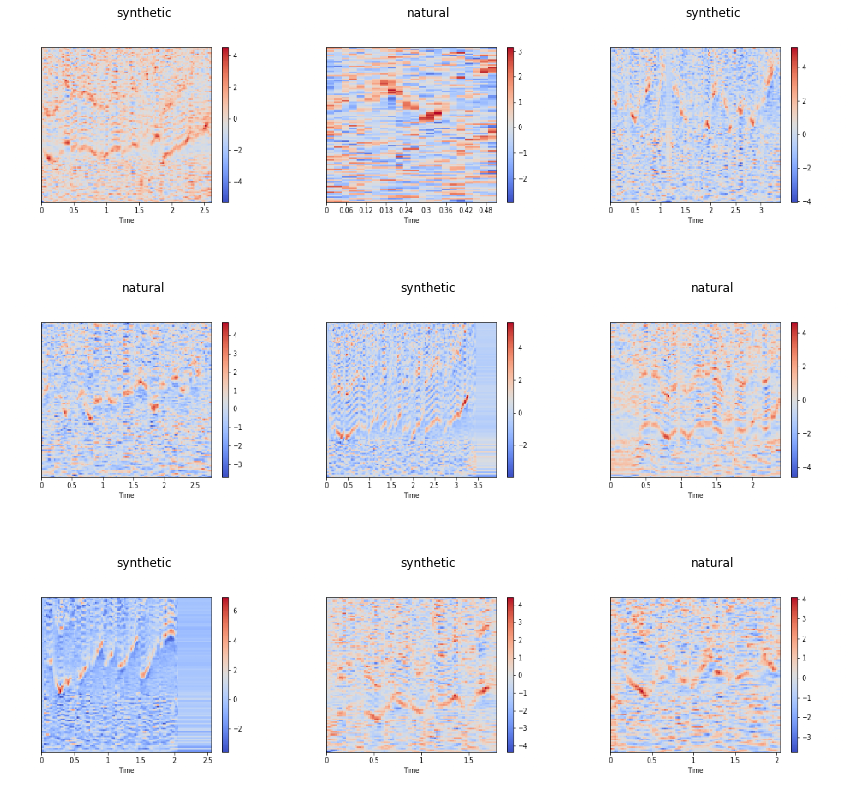

In [14]:
data.show_batch(3)

### Now we check results, and save our model (both .pth and .pkl)

# Inference

In [28]:
learn=learn.load('SecondClassR3410epochUnf')

RuntimeError: Error(s) in loading state_dict for Sequential:
	size mismatch for 1.8.weight: copying a param with shape torch.Size([2, 512]) from checkpoint, the shape in current model is torch.Size([4, 512]).
	size mismatch for 1.8.bias: copying a param with shape torch.Size([2]) from checkpoint, the shape in current model is torch.Size([4]).

In [20]:
#Added support to files in ffmpeg using ffmpeg to convert it to wav before preprocessing.
ffmpeg=['.mp4','.ogg','.m4a']
def get_waveplot(file,dest='/proc/',plots='/plots/'):
    try:
        #I need to convert the file to wav, norm, 
        #trim silence (anything less than 3% volume) until we encounter sound lasting more than 0.5 seconds in duration
        proc='_p'
        ext='.wav'
        #I create a new file with added _p.wav at the end
        if file.suffix in ffmpeg:
            subprocess.call(f"ffmpeg -i \"{str(file)}\" -ac 1 \"{str(file)[:-4]+ext}\"", shell=True)
            subprocess.call(f"sox \"{str(file)[:-4]+ext}\" -r 16000 \"{str(file)[:-4]+proc+ext}\" norm silence 1 0.1 3% -1 0.1 3%", shell=True)
            subprocess.call(f"rm \"{str(file)[:-4]+ext}\"", shell=True)

        else:
            subprocess.call(f"sox \"{str(file)}\" -r 16000 \"{str(file)[:-4]+proc+ext}\" norm silence 1 0.1 3% -1 0.1 3%", shell=True)
        #I moved said _p.wav file to the dest folder.
        path = Path(file)
        destinationpath = str(path.parent) + (dest) + str(path.stem) + ext
        if not os.path.exists(str(path.parent) + (dest)):
            os.mkdir(str(path.parent) + (dest))
        subprocess.call(f"mv \"{str(file)[:-4]+proc+ext}\" \"{destinationpath}\"", shell=True)
        #Load the audio, create waveplot and save it in the plot dir
        y, sr = librosa.load(Path(destinationpath),sr=16000)
        librosa.display.waveplot(y, sr=sr);
        plot = str(path.parent) + (plots) + str(path.name)
        if not os.path.exists(str(path.parent) + (plots)):
            os.mkdir(str(path.parent) + (plots))
        plt.savefig(Path(plot).with_suffix('.png'));
        plt.clf();
        return Path(plot).with_suffix('.png');
    except FileNotFoundError as not_found:
        print(f"{path} not found");
    except librosa.util.exceptions.ParameterError as short_file:
        print(f"{path} was a short file");
#Definition of functions to get, plot and save MFCCs
def get_mfcc(file,n_mfcc=100,dest='/proc/',plots='/plots/'):
    proc='_p'
    ext='.wav'
    file=Path(file)
    #I create a new file with added _p.wav at the end
    if file.suffix in ffmpeg:
        subprocess.call(f"ffmpeg -i \"{str(file)}\" -ac 1 \"{str(file)[:-4]+ext}\"", shell=True)
        subprocess.call(f"sox \"{str(file)[:-4]+ext}\" -r 16000 \"{str(file)[:-4]+proc+ext}\" norm silence 1 0.1 3% -1 0.1 3%", shell=True)
        subprocess.call(f"rm \"{str(file)[:-4]+ext}\"", shell=True)
    else:
        subprocess.call(f"sox \"{str(file)}\" -r 16000 \"{str(file)[:-4]+proc+ext}\" norm silence 1 0.1 3% -1 0.1 3%", shell=True)
    #I moved said _p.wav file to the dest folder.
    destinationpath = str(file.parent) + (dest) + str(file.stem) + ext
    if not os.path.exists(str(file.parent) + (dest)):
        os.mkdir(str(file.parent) + (dest))
    subprocess.call(f"mv \"{str(file)[:-4]+proc+ext}\" \"{destinationpath}\"", shell=True)

    y, sr = librosa.load(file, mono=True, sr=16000)
    return librosa.feature.mfcc(y, sr=sr, n_mfcc=n_mfcc)
    
def plot_mfcc(mfccs):
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()

def save_scale_mfccs(file,dest='/mfc/', **kwargs):
    path = Path(file)
    plot_mfcc(scale(get_mfcc(path,**kwargs), axis=1))
    plot = str(path.parent) + (dest) + str(path.name)
    if not os.path.exists(str(path.parent) + (dest)):
        os.mkdir(str(path.parent) + (dest))
    plt.savefig(Path(plot).with_suffix('.png'))
    plt.clf()
    return Path(plot).with_suffix('.png');


In [16]:
def inference_wave(file):
    plot=get_waveplot(file)
    return pred(plot)
def inference_mfcc(file):
    plot=save_scale_mfccs(file)
    return pred(plot)
def pred(file):
    res = learn.predict(open_image(file))
    return res

In [39]:
audio_folder='/home/javio/Audio/CommonVoice/Spanish/mfccs/inference/'
#plot=get_waveplot(audio_to_predict)
for file in Path(audio_folder).iterdir():
    if file.is_file(): 
        res=inference_mfcc((file));
        print(f"For {file.name} the voice is {str(res[0])} with {round(float(res[2].max()*100),2)} % prob.")

For chuco.ogg the voice is synthetic with 99.99 % prob.
For amzsyn.mp4 the voice is synthetic with 99.84 % prob.
For jazztrim.wav the voice is natural with 99.67 % prob.
For amznat.mp4 the voice is synthetic with 99.74 % prob.
For movis.wav the voice is synthetic with 99.98 % prob.


<Figure size 432x288 with 0 Axes>

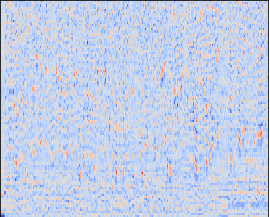

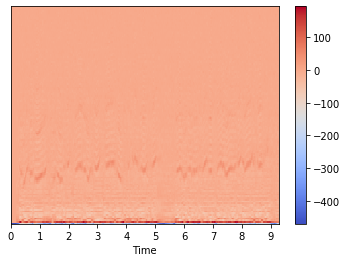

In [28]:
file_p='/home/javio/Audio/CommonVoice/Spanish/mfccs/inference/proc/amznat.wav'
file='/home/javio/Audio/CommonVoice/Spanish/mfccs/inference/chuco.ogg'

plot_mfcc((get_mfcc(file,n_mfcc=128)))
img='/home/javio/Audio/CommonVoice/Spanish/mfccs/inference/mfc/amznat.png'
open_image(img)

In [21]:
file_to_predict='/home/javio/Audio/CommonVoice/Spanish/waveplots/toploss.png'

pred(file_to_predict)

(Category natural, tensor(0), tensor([9.9987e-01, 1.2740e-04]))

In [10]:
interp.top_losses().values[:2500]

NameError: name 'interp' is not defined

In [11]:
data.valid_ds.items[11039]

PosixPath('/home/javio/Audio/CommonVoice/Spanish/waveplots/valid/synthetic/Google_common_voice_es_18631869.png')

## Previous approach to load pkl and pass a folder

In [ ]:
preds, yy = learn2.get_preds(ds_type=DatasetType.Train)

In [ ]:
data2 = ImageDataBunch.from_df(path, valid_dataset, size=256,valid_pct=0).normalize(imagenet_stats)
learn2 = load_learner(path, test=ImageList.from_folder('/home/javio/MURA/MURA-v1.1/valid'))
learn2.data = data2
learn2 = learn2.to_fp16()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(preds, 1),yy)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(np.argmax(preds, 1),yy)

In [4]:
learn.load('ThirdClassR3430epochUnf')

Learner(data=ImageDataBunch;

Train: LabelList (26423 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Valid: LabelList (12975 items)
x: ImageList
Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320),Image (3, 240, 320)
y: CategoryList
natural,natural,natural,natural,natural
Path: /home/javio/Audio/CommonVoice/Spanish/waveplots;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1,